In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper import get_response_data, derivative, lr_decay, rms_prop
%matplotlib inline

## Get the sample data

In [2]:
# Generate data for performing the gradient descent with Adam

# Get the 500 predictor data points from -15 to 15
x = np.linspace(-15,15,500)

# Generate the response data from predictor data using function get_response_data above
y = get_response_data(x)


## Visualize the sample loss landscape

Here we assume that $Y$ is the loss, and $X$ is the weight to be updated.

${\partial L}/{\partial w} = {\partial y}/{\partial x}$

Text(0, 0.5, '$Y$')

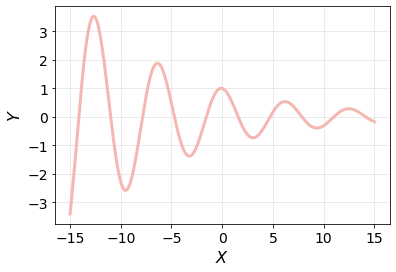

In [34]:
# Plot the generated data
plt.plot(x, y, linewidth=3, color='#F5B7B1')
plt.grid(alpha=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$Y$', fontsize=16)

## Effective Learning rate over epochs

1. RMS Prop
2. Exponential Decay


## Here $\epsilon$ is the initial learning rate 

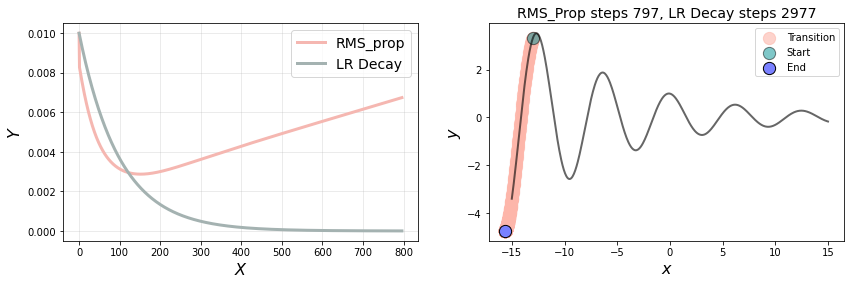

In [36]:
# Select an epsilon value that is less than or equal to 1
epsilon = 0.01
    
# # Initialise the weights to a random value between -15 and 15 (which are the min and max value of x) 
# W = np.random.uniform(-15,15) 

# Get the weights after gradient descent with Adam by calling the adam_descent function with the initialised weight and selected epsilon value
Ws,rms = rms_prop(-13, epsilon=epsilon,)
Ws, lrs = lr_decay(-13,epsilon=epsilon,decay_rate=0.01)

# Plot the effective learning rate over epochs
fig, ax = plt.subplots(1,2,figsize=(14,4))
ax[0].plot(rms, linewidth=3, color='#F5B7B1',label = f'RMS_prop')
ax[0].plot(lrs[:len(rms)], linewidth=3, color='#A4B2B1',label = f'LR Decay')
ax[0].grid(alpha=0.3)
ax[0].set_xlabel('$X$', fontsize=16)
ax[0].set_ylabel('$Y$', fontsize=16)
ax[0].legend(fontsize=14)

# Plot the original data
ax[1].plot(x, y, color='black', alpha=0.6, linewidth=2)
ax[1].scatter(np.array(Ws), get_response_data(np.array(Ws)), s=150, label='Transition', color='#FDB6AA', alpha=0.6)

# Plot the starting point
ax[1].scatter(Ws[0], get_response_data(Ws[0]), c='#009193', s=150, label='Start', alpha=0.5, edgecolor='black')

# Plot the ending point
ax[1].scatter(Ws[-1], get_response_data(Ws[-1]), c='#7A81FF', s=150, label='End',edgecolor='black')
ax[1].set_xlabel("$x$", fontsize=16)
ax[1].set_ylabel("$y$", fontsize=16)
ax[1].legend(loc='best');
ax[1].set_title(f'RMS_Prop steps {len(rms)}, LR Decay steps {len(lrs)}' ,fontsize=14);